In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pickle

# Tiền xử lý dữ liệu :
>+ Đưa dữ liệu explicit về implicit
>+ Loại bỏ các user ít tương tác

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project3/ml-1m/ratings.dat',sep='::',header=None)
df=df.rename(columns={0:'userId',1:'movieId',2:'rating',3:'timestamp'})
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
num_user_raw=len(set(list(df.userId.tolist())))
num_item_raw=len(set(list(df.movieId.tolist())))
print("so user ban dau:",num_user_raw)
print("so item ban dau:",num_item_raw)

so user ban dau: 6040
so item ban dau: 3706


In [ ]:
user2item=df.groupby('userId').apply(lambda x: dict(zip(x['rating'],x['timestamp'])))

In [ ]:
user2item.head()

userId
1           {5: 978301619, 3: 978824268, 4: 978302091}
2    {5: 978298652, 4: 978298478, 3: 978299143, 2: ...
3    {4: 978298504, 2: 978297837, 3: 978298231, 5: ...
4    {5: 978294260, 3: 978293924, 4: 978294230, 2: ...
5    {4: 978244493, 5: 978245065, 3: 978244808, 2: ...
dtype: object

In [ ]:
list_user=list(user2item.keys())
print(list_user)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [ ]:
# tinh trung binh cac rating cua moi user 
rating=np.zeros_like(list_user)
list_rating=[]
for user in list_user:
    list_rating_user=list(user2item[user].keys())
    list_rating.append(np.mean(list_rating_user))
user2rating=dict(zip(list_user,list_rating))


In [ ]:
list_idx_drop=[]
n_data,_=df.shape
print(n_data)
for i in range(n_data):
    user=df.loc[i,'userId']
    rating=df.loc[i,'rating']
    if(rating<user2rating[user]-1):
        list_idx_drop.append(i)
    # if(i%10000==0):
    #     print(i)
print(len(list_idx_drop))

1000209
60522


In [ ]:
#loai cac rating < trung binh cua moi user
df.drop(list_idx_drop,inplace=True)
df=df.reset_index(drop=True)
num_user_new=len(set(list(df.userId.tolist())))
num_item_new=len(set(list(df.movieId.tolist())))
print("so user sau khi loai bo:",num_user_new)
print("so movie sau khi loai bo:",num_item_new)

so user sau khi loai bo: 6040
so movie sau khi loai bo: 3679


In [ ]:
n_user_watched=df.groupby('userId').size()
df_tmp=df[df['userId'].isin(n_user_watched.index[n_user_watched>=5])]
num_user_new=len(set(list(df_tmp.userId.tolist())))
num_item_new=len(set(list(df_tmp.movieId.tolist())))
print("so user sau khi loai bo:",num_user_new)
print("so movie sau khi loai bo:",num_item_new)

so user sau khi loai bo: 6040
so movie sau khi loai bo: 3679


In [ ]:
#Lưu lại dữ liệu sau khi đã tiền xử lý
df_tmp.to_csv('/content/drive/MyDrive/Project3/rating.csv',index=False)

#Thống kê tỉ lệ top K thê loại phim xem nhiều nhất của user

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project3/rating.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [17]:
df_movie=pd.read_csv('/content/drive/MyDrive/Project3/ml-1m/movies.dat',sep='::',header=None)
df_movie=df_movie.rename(columns={0:'movieId',1:'title',2:'genre'})
df_movie.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,movieId,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
title=list(df_movie.title.tolist())
n_movie=len(title)
for i in range(n_movie):
    title[i]=title[i].lower()
    new_title=title[i].split()[:-1]
    title[i]=' '.join(new_title)
print(title[0])

toy story


In [ ]:
df_movie['title']=title
df_movie.head()

,movieId,title,genre
0,1,toy story,Animation|Children's|Comedy
1,2,jumanji,Adventure|Children's|Fantasy
2,3,grumpier old men,Comedy|Romance
3,4,waiting to exhale,Comedy|Drama
4,5,father of the bride part ii,Comedy


In [ ]:
df_movie.to_csv('/content/drive/MyDrive/Project3/ml-1m/movies.csv',index=False)

In [ ]:
genre2id={'Action':0,\
	'Adventure':1,\
	'Animation':2,\
	'Children\'s':3,\
	'Comedy':4,\
	'Crime':5,\
	'Documentary':6,\
	'Drama':7,\
    'Fantasy':8,\
	'Film-Noir':9,\
	'Horror':10,\
	'Musical':11,\
	'Mystery':12,\
	'Romance':13,\
	'Sci-Fi':14,\
	'Thriller':15,\
	'War':16,\
	'Western':17}
print(genre2id)

{'Action': 0, 'Adventure': 1, 'Animation': 2, "Children's": 3, 'Comedy': 4, 'Crime': 5, 'Documentary': 6, 'Drama': 7, 'Fantasy': 8, 'Film-Noir': 9, 'Horror': 10, 'Musical': 11, 'Mystery': 12, 'Romance': 13, 'Sci-Fi': 14, 'Thriller': 15, 'War': 16, 'Western': 17}


In [ ]:
list_genres=list(df_movie.genre.tolist())
n_data=len(list_genres)
one_hot_genre=[]
for i in range(n_data):
    one_hot=[0]*18
    new_genre=list_genres[i].split('|')
    for g in new_genre:
        one_hot[genre2id[g]]=1
    one_hot_genre.append(one_hot)


In [ ]:
df_movie['one_hot_genre']=one_hot_genre
df_movie.head()

,movieId,title,genre,one_hot_genre
0,1,toy story,Animation|Children's|Comedy,"[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,jumanji,Adventure|Children's|Fantasy,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,3,grumpier old men,Comedy|Romance,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
3,4,waiting to exhale,Comedy|Drama,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,father of the bride part ii,Comedy,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
print(df_movie.shape)

(3883, 4)


In [ ]:
movieid_2_onehoegenre=dict(zip(list(df_movie.movieId.tolist()),one_hot_genre))
print(movieid_2_onehoegenre[1])

[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
user2movie=df.groupby('userId').apply(lambda x: dict(zip(x['movieId'],x['timestamp'])))
sum_genre_watch=[]

for user in list(user2movie.keys()):
    sum_one_hot=np.zeros(18,dtype=np.int)
    list_moiveId=list(user2movie[user].keys())
    for movieId in list_moiveId:
        sum_one_hot+=movieid_2_onehoegenre[movieId]
    sum_genre_watch.append(sum_one_hot)


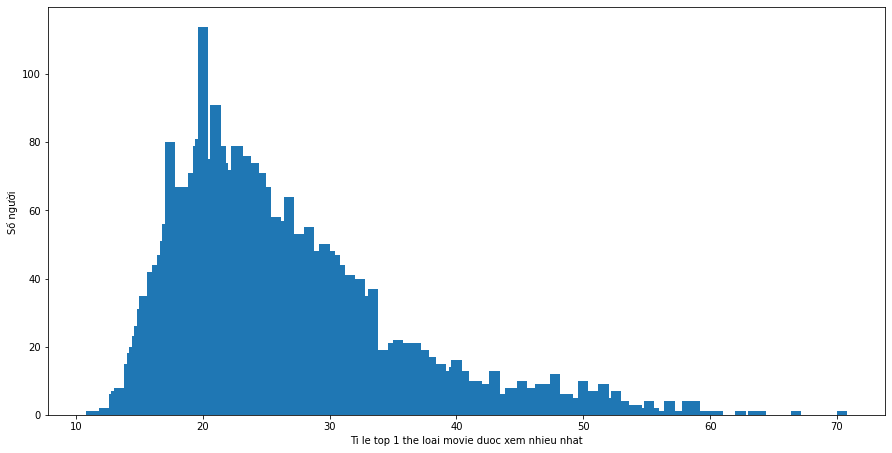

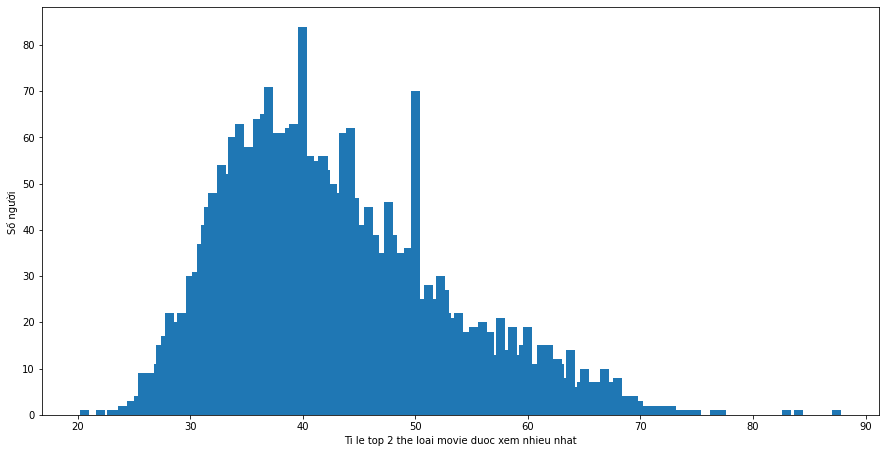

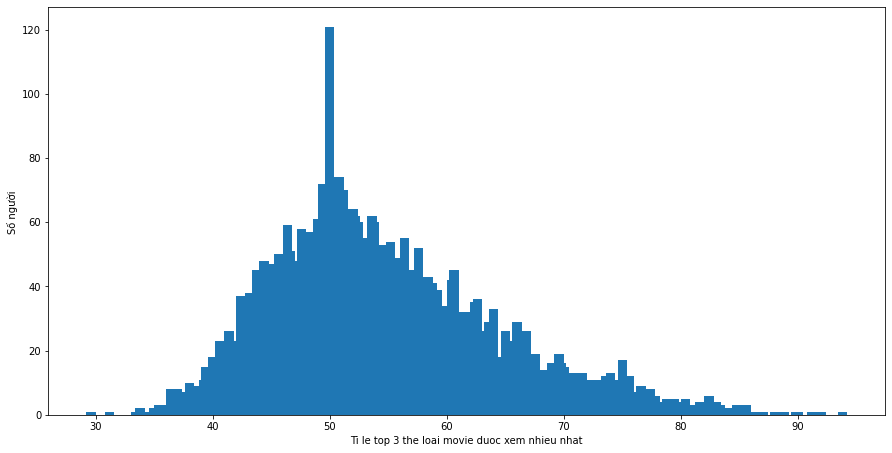

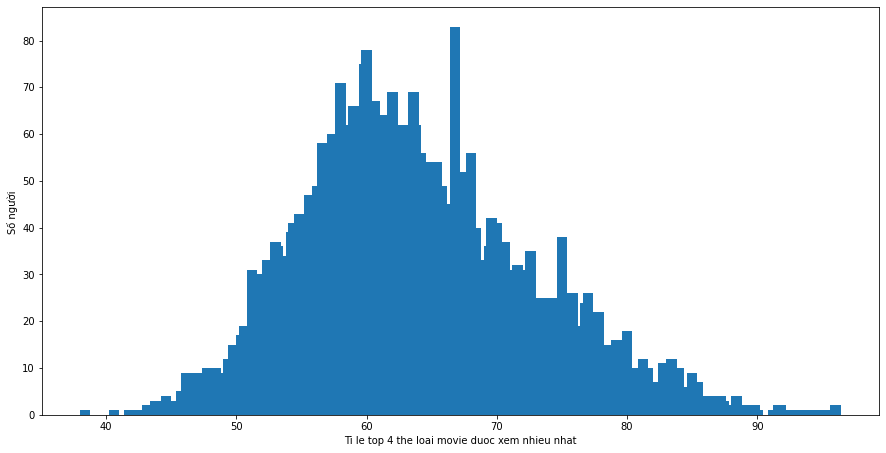

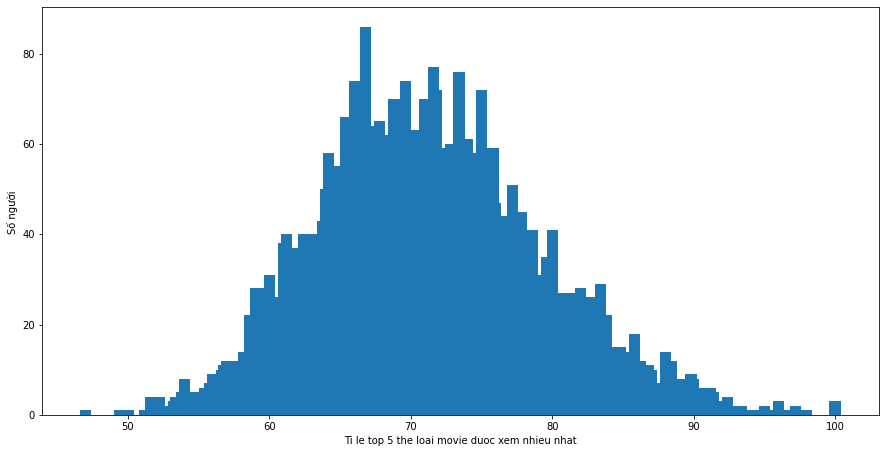

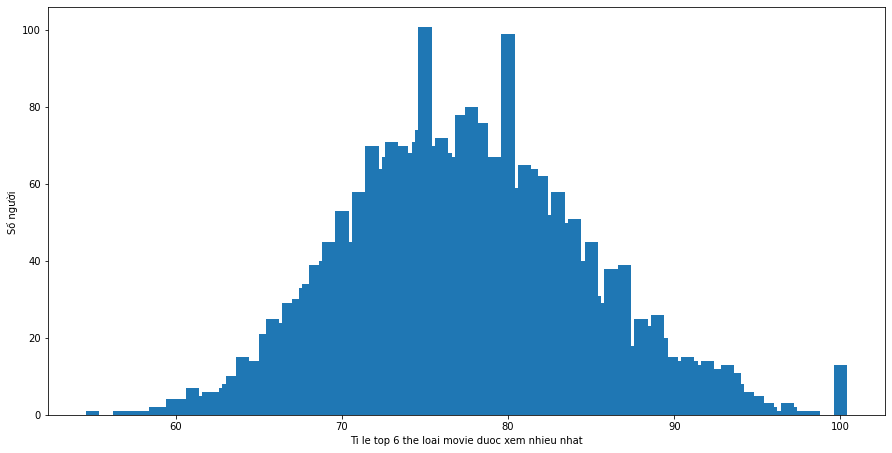

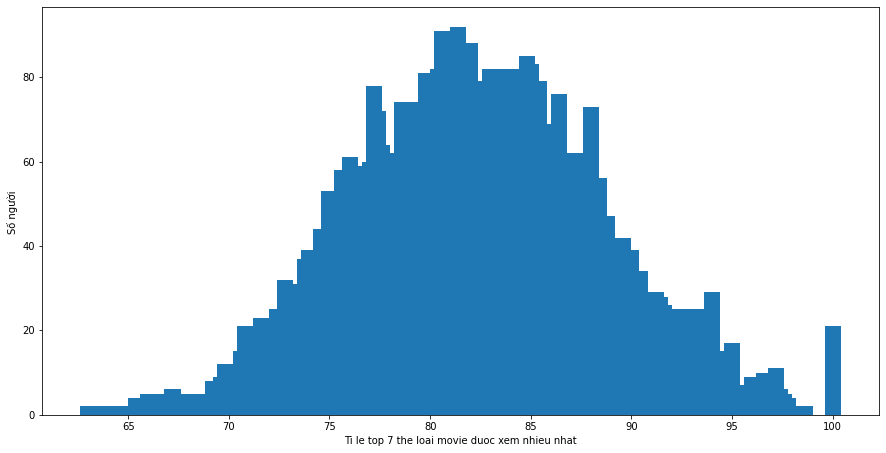

In [ ]:
from collections import defaultdict
def visualize(k,sum_genre_watch):
    tmp=defaultdict(int)
    n_data=len(sum_genre_watch)
    for i in range(n_data):
        idx_top_k=np.argpartition(sum_genre_watch[i],-k)[-k:]
        gt=np.sum(sum_genre_watch[i][idx_top_k])/np.sum(sum_genre_watch[i])*100
        gt=np.ceil(gt*5)/5
        tmp[gt]+=1
    tmp=sorted(tmp.items())
    list_num_user=[]
    list_gt=[]
    for i in tmp:
        gt,num_user=i
        list_num_user.append(num_user)
        list_gt.append(gt)
    fig = plt.figure(figsize = (15, 7.5))
    # print(list_gt)
    # print(list_num_user)
    plt.bar(list_gt,list_num_user)
    plt.xlabel('Ti le top '+str(k)+' the loai movie duoc xem nhieu nhat')
    plt.ylabel('Số người ')
    plt.show()

for i in range(1,8):
    visualize(i,sum_genre_watch)
    

#Tiền xử lý dữ liệu cho mô hình Content-based
>+ Tính vector embedding của title
>+ Tìm vector genres category

In [ ]:
df_movie=pd.read_csv('/content/drive/MyDrive/Project3/ml-1m/movies.csv')
df_movie.head()

,movieId,title,genre
0,1,toy story,Animation|Children's|Comedy
1,2,jumanji,Adventure|Children's|Fantasy
2,3,grumpier old men,Comedy|Romance
3,4,waiting to exhale,Comedy|Drama
4,5,father of the bride part ii,Comedy


In [ ]:
list_genres=list(df_movie.genre.tolist())
n_data=len(list_genres)
list_cat=[]
for i in range(n_data):
    cats=[]
    new_genre=list_genres[i].split('|')
    for g in new_genre:
        cats.append(genre2id[g]+1)
    cats=cats+[0]*(19-len(cats))
    list_cat.append(cats)
print(list_cat[0])

[3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
movieId2cats=dict(zip(list_movie,list_cat))
with open('/content/drive/MyDrive/Project3/movieId2cats.p','wb') as f:
    pickle.dump(movieId2cats,f,protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
df_movie['catid']=list_cat
df_movie.head()

,movieId,title,genre,catid
0,1,toy story,Animation|Children's|Comedy,"[3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,jumanji,Adventure|Children's|Fantasy,"[2, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,grumpier old men,Comedy|Romance,"[5, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,4,waiting to exhale,Comedy|Drama,"[5, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,father of the bride part ii,Comedy,"[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
df_movie.to_csv('/content/drive/MyDrive/Project3/ml-1m/movies.csv',index=False)
df_movie=pd.read_csv('/content/drive/MyDrive/Project3/ml-1m/movies.csv')
df_movie.head()

,movieId,title,genre,catid
0,1,toy story,Animation|Children's|Comedy,"[3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,jumanji,Adventure|Children's|Fantasy,"[2, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,grumpier old men,Comedy|Romance,"[5, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,4,waiting to exhale,Comedy|Drama,"[5, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,father of the bride part ii,Comedy,"[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
type(df_movie.loc[0,'catid'])

str

In [ ]:
!pip install wikipedia2vec

     |████████████████████████████████| 1.2MB 6.0MB/s 
     |████████████████████████████████| 276kB 31.1MB/s 
     |████████████████████████████████| 184kB 16.2MB/s 
  Created wheel for wikipedia2vec: filename=wikipedia2vec-1.0.4-cp36-cp36m-linux_x86_64.whl size=4581852 sha256=c9a798ce5ca7196652960e0e2027a5f4e28323062debdf379a16c5f97e4a4bbc
  Stored in directory: /root/.cache/pip/wheels/16/e7/02/852c8ce366cc10adcf5d43c6471bbf926dd15c277578c13184
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp36-cp36m-linux_x86_64.whl size=862512 sha256=58e1f35ab9f27080fa839b211acc2dd34d3fcb597091d401dd825defd07d998e
  Stored in directory: /root/.cache/pip/wheels/45/24/79/022624fc914f0e559fe8a1141aaff1f9df810905a13fc75d57
Successfully built wikipedia2vec marisa-trie


In [ ]:
!wget "http://nlp.stanford.edu/data/glove.6B.zip"

--2021-01-05 03:36:48--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-01-05 03:36:48--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-01-05 03:36:49--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
import numpy as np
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
!unzip '/content/glove.6B.zip' -d '/content/'

Archive:  /content/glove.6B.zip
  inflating: /content/glove.6B.50d.txt  
  inflating: /content/glove.6B.100d.txt  
  inflating: /content/glove.6B.200d.txt  
  inflating: /content/glove.6B.300d.txt  


In [ ]:
with open('/content/glove.6B.50d.txt','r') as f:
    data=f.read()
data='400000 50'+'\n'+data
with open('/content/glove.6B.50d_new.txt','w') as f:
    f.write(data)

In [ ]:
from gensim.models import KeyedVectors
word2vec = KeyedVectors.load_word2vec_format('/content/glove.6B.50d_new.txt')

In [ ]:
df_movie.head()

,movieId,title,genre,catid
0,1,toy story,Animation|Children's|Comedy,"[3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,jumanji,Adventure|Children's|Fantasy,"[2, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,grumpier old men,Comedy|Romance,"[5, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,4,waiting to exhale,Comedy|Drama,"[5, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,father of the bride part ii,Comedy,"[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
list_title=list(df_movie.title.tolist())
n_data=len(list_title)
embedding_title=[]
for i in range(n_data):
    tmp=list_title[i].split()
    embed=np.zeros(50)
    for j in tmp:
        try:
            embed+=word2vec[j]
        except:
            pass
    embedding_title.append(list(embed))
list_movie=list(df_movie.movieId.tolist())
movieId2embed=dict(zip(list_movie,embedding_title)) # title embedding


In [ ]:
import pickle
with open('/content/drive/MyDrive/Project3/movieId2embed.p','wb') as f:
    pickle.dump(movieId2embed,f,protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
data=open('/content/drive/MyDrive/Project3/movieId2embed.p','rb')
data=pickle.load(data)
print(len(data[1]))

50


In [ ]:
num_cat=18
cat_masking=np.zeros((num_cat+1,num_cat*30),dtype=np.int)
for i in range(1,num_cat):
    cat_masking[i][(i-1)*30:i*30]=1
dict_cat_masking=dict(zip([x for x in range(num_cat+1)],cat_masking))
with open('/content/drive/MyDrive/Project3/cat_masking.p','wb') as f:
    pickle.dump(dict_cat_masking,f,protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Padding the item 0
title_embedding=open('/content/drive/MyDrive/Project3/movieId2embed.p','rb')
title_embedding=pickle.load(title_embedding)

title_embedding[0]=[0]*50
with open('/content/drive/MyDrive/Project3/movieId2embed.p','wb') as f:
    pickle.dump(title_embedding,f,protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
cat=open('/content/drive/MyDrive/Project3/movieId2cats.p','rb')
cat=pickle.load(cat)
cat[0]=[0]*19
with open('/content/drive/MyDrive/Project3/movieId2cats.p','wb') as f:
    pickle.dump(cat,f,protocol=pickle.HIGHEST_PROTOCOL)

#Chia dữ liệu train test

In [21]:
data=open('/content/drive/MyDrive/Project3/movieId2embed.p','rb')
data=pickle.load(data)
movieId2idx=list(data.keys())
movieId2idx=dict(zip(movieId2idx,[x for x in range(1,len(movieId2idx)+1)]))


In [24]:
df=pd.read_csv('/content/drive/MyDrive/Project3/rating.csv')
df=df.sort_values(by=['userId','timestamp'])
df=df.reset_index(drop=True)
df.head()

,userId,movieId,rating,timestamp
0,1,3186,4,978300019
1,1,1270,5,978300055
2,1,1721,4,978300055
3,1,1022,5,978300055
4,1,2340,3,978300103


In [25]:
user2item=df.groupby('userId').apply(lambda x: dict(zip(x['movieId'],x['timestamp'])))

In [26]:
total_movie=[]      # tong so phim ma moi user da xem
for user in list(user2item.keys().tolist()):
    total_movie.append(len(user2item[user]))

# chia du lieu train, val, test theo ty le : 0.8:0.1:0.1

In [27]:
n_sample_test=np.array(total_movie)*0.1
n_sample_test=np.array(n_sample_test,dtype=np.int)+1
n_sample_train=np.array(total_movie,dtype=np.int)-n_sample_test*2

In [31]:
# Chuyen du lieu thanh dang chuoi
max_seq=9
list_data=[]
for user in list(user2item.keys()):
    list_item_user_watch=list(user2item[user].keys())
    list_item_user_watch=[movieId2idx[x] for x in list_item_user_watch]
    n_item=len(list_item_user_watch)
   
    for i in range(n_item-1):
        seq=[user]
        seq+=[0]*(max_seq-i-1)+list_item_user_watch[max(0,i+1-max_seq):i+1]
        label=[]
        label+=[list_item_user_watch[i+1]] # id label
        seq+=label
        while True:
            candidate=list(np.random.choice(3884,99,replace=False))
            if(len(set(seq[1:]+candidate))==len(set(seq[1:]))+99):
                seq+=candidate
                break
        list_data.append(seq)
        

In [32]:
data_train=[]
data_test=[]
data_val=[]
old_user=1
count_user=0
sum_sample=0
for sample in list_data:
    user=sample[0]
    if(user!=old_user):
        old_user=user
        count_user+=1
        sum_sample=0
    else:
        sum_sample+=1
        if(sum_sample<=n_sample_train[count_user]):
            data_train.append(sample)
        elif(sum_sample<n_sample_train[count_user]+n_sample_test[count_user]):
            data_val.append(sample)
        else:
            data_test.append(sample)
print('data train: ',len(data_train))
print('data val: ',len(data_val))
print('data test: ',len(data_test))


data train:  745089
data val:  91259
data test:  91260


In [33]:
# save data train,test
def save_data(path,data):
    n_data=len(data)
    for i in range(n_data):
        data[i]=list(np.array(data[i],dtype=np.str))
        data[i]=' '.join(data[i])
    with open(path,'w') as f:
        f.write('\n'.join(data))

path_train='/content/drive/MyDrive/Project3/data_train.txt'
path_val='/content/drive/MyDrive/Project3/data_val.txt'
path_test='/content/drive/MyDrive/Project3/data_test.txt'

save_data(path_train,data_train)
save_data(path_val,data_val)
save_data(path_test,data_test)